In [10]:
import numpy as np
from tensorflow import keras
from keras import models 
from keras import layers
import matplotlib.pyplot as plt
from keras.models import Sequential

from keras.datasets import imdb
# https://www.imdb.com/
(X, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [2]:
# text to vector
def vect(seq, dim=10000):
    x=np.zeros((len(seq),dim))
    for n, i in enumerate(seq):
        x[n, i] = 1
    return x

X_train=vect(X)
X_test=vect(X_test)

In [3]:
X_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [4]:
net = models.Sequential()
net.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(16, activation='relu'))
net.add(layers.Dropout(0.5))
net.add(layers.Dense(1, activation='sigmoid'))
net.compile(optimizer='nadam', loss='binary_crossentropy', metrics = ['acc'])

X_val = X_train[:10000]
partial_X_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

val = net.fit(partial_X_train, partial_y_train, epochs=5, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/5
118/118 [==============================] - 2s 15ms/step - loss: 0.5856 - acc: 0.6787 - val_loss: 0.3875 - val_acc: 0.8665
Epoch 2/5
118/118 [==============================] - 1s 12ms/step - loss: 0.3899 - acc: 0.8427 - val_loss: 0.2995 - val_acc: 0.8851
Epoch 3/5
118/118 [==============================] - 1s 12ms/step - loss: 0.2977 - acc: 0.8958 - val_loss: 0.2890 - val_acc: 0.8846
Epoch 4/5
118/118 [==============================] - 1s 12ms/step - loss: 0.2433 - acc: 0.9167 - val_loss: 0.3072 - val_acc: 0.8790
Epoch 5/5
118/118 [==============================] - 1s 12ms/step - loss: 0.2035 - acc: 0.9285 - val_loss: 0.2882 - val_acc: 0.8839


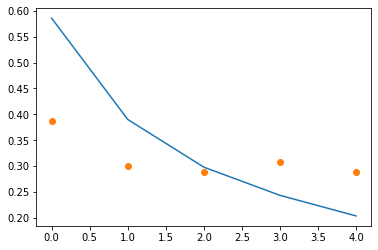

In [5]:
val_dict = val.history
loss = val_dict['loss']
val_loss = val_dict['val_loss']
x = np.arange(0,len(loss))

plt.plot(x,loss,'-')
plt.plot(x,val_loss,'o')

In [6]:
test_loss, test_acc = net.evaluate(X_test,y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3058 - acc: 0.8777


In [26]:
from keras.preprocessing import sequence

max_words=10000 
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)

maxlen = 100 # sequence length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)

In [8]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) # 각각의 단어를 n=16 차원 공간에 올리기
rnn.add(layers.SimpleRNN(32,return_sequences='True')) 
# 다층 RNN를 하기 위해 return_sequences = True로 설정

In [15]:
from keras.preprocessing import sequence
max_words=10000 

In [20]:
rnn = models.Sequential()
rnn.add(layers.Embedding(max_words, 16)) 

rnn.add(layers.SimpleRNN(16,activation = 'relu',return_sequences = True)) 

rnn.add(Dense(1, activation='sigmoid'))
rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [22]:
rnn.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 16)          528       
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           17        
Total params: 160,545
Trainable params: 160,545
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = rnn.fit(X_train,y_train,epochs = 10 ,batch_size = 128,verbose=1,validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 4s 27ms/step - loss: 0.4776 - accuracy: 0.7646 - val_loss: 0.5178 - val_accuracy: 0.7427
Epoch 2/10
157/157 [==============================] - 5s 29ms/step - loss: 0.4068 - accuracy: 0.8080 - val_loss: 0.5074 - val_accuracy: 0.7432
Epoch 3/10
157/157 [==============================] - 5s 29ms/step - loss: 0.3665 - accuracy: 0.8302 - val_loss: 0.5387 - val_accuracy: 0.7361
Epoch 4/10
157/157 [==============================] - 4s 26ms/step - loss: 0.3350 - accuracy: 0.8452 - val_loss: 0.5899 - val_accuracy: 0.7276
Epoch 5/10
157/157 [==============================] - 4s 26ms/step - loss: 0.3125 - accuracy: 0.8550 - val_loss: 0.6274 - val_accuracy: 0.7286
Epoch 6/10
157/157 [==============================] - 4s 26ms/step - loss: 0.2942 - accuracy: 0.8626 - val_loss: 0.6703 - val_accuracy: 0.7247
Epoch 7/10
157/157 [==============================] - 4s 26ms/step - loss: 0.2669 - accuracy: 0.8739 - val_loss: 0.7583 - val_accuracy: 0.7176

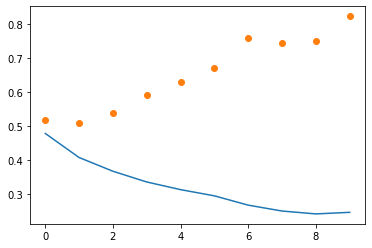

In [37]:
loss=history.history['loss']
val=history.history['val_loss']
plt.plot(loss)
plt.plot(val,'o')

In [39]:
rnn_test_loss, rnn_test_acc = rnn.evaluate(X_test,y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.8244 - accuracy: 0.7070


In [40]:
print(rnn_test_loss,rnn_test_acc)

0.8243600726127625 0.7070218920707703
